# Recommender System

In [2]:
# importing Libraries 
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams["figure.figsize"]=(12,8)
pd.options.display.float_format = '{:.2f}'.format



In [3]:
data=pd.read_csv(r"C:\Users\minak\Desktop\AIML\Recommender System\Untitled Folder 1\movie_metadata.csv")

In [4]:
data.shape

(5043, 28)

In [5]:
data.head().T

,0,1,2,3,4
color,Color,Color,Color,Color,NaN
director_name,James Cameron,Gore Verbinski,Sam Mendes,Christopher Nolan,Doug Walker
num_critic_for_reviews,723.00,302.00,602.00,813.00,NaN
duration,178.00,169.00,148.00,164.00,NaN
director_facebook_likes,0.00,563.00,0.00,22000.00,131.00
actor_3_facebook_likes,855.00,1000.00,161.00,23000.00,NaN
actor_2_name,Joel David Moore,Orlando Bloom,Rory Kinnear,Christian Bale,Rob Walker
actor_1_facebook_likes,1000.00,40000.00,11000.00,27000.00,131.00
gross,760505847.00,309404152.00,200074175.00,448130642.00,NaN
genres,Action|Adventure|Fantasy|Sci-Fi,Action|Adventure|Fantasy,Action|Adventure|Thriller,Action|Thriller,Documentary


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      5024 non-null   object 
 1   director_name              4939 non-null   object 
 2   num_critic_for_reviews     4993 non-null   float64
 3   duration                   5028 non-null   float64
 4   director_facebook_likes    4939 non-null   float64
 5   actor_3_facebook_likes     5020 non-null   float64
 6   actor_2_name               5030 non-null   object 
 7   actor_1_facebook_likes     5036 non-null   float64
 8   gross                      4159 non-null   float64
 9   genres                     5043 non-null   object 
 10  actor_1_name               5036 non-null   object 
 11  movie_title                5043 non-null   object 
 12  num_voted_users            5043 non-null   int64  
 13  cast_total_facebook_likes  5043 non-null   int64

In [7]:
#lets remove unnecessary column from our dataset
column_to_drop=["color","director_facebook_likes","actor_3_facebook_likes","actor_1_facebook_likes",
                "cast_total_facebook_likes","facenumber_in_poster","actor_2_facebook_likes","country",
                "movie_imdb_link","plot_keywords","aspect_ratio"]
data.drop(column_to_drop,axis=1,inplace=True)


In [8]:
#Check the final shape
data.shape

(5043, 17)

In [9]:
#check for NaN
#round(100*(data.isna().sum()/len(data)),3)
data.isna().sum()


director_name             104
num_critic_for_reviews     50
duration                   15
actor_2_name               13
gross                     884
genres                      0
actor_1_name                7
movie_title                 0
num_voted_users             0
actor_3_name               23
num_user_for_reviews       21
language                   12
content_rating            303
budget                    492
title_year                108
imdb_score                  0
movie_facebook_likes        0
dtype: int64

In [10]:
'director_name', 'num_critic_for_reviews','duration','director_facebook_likes',
'actor_3_facebook_likes','actor_2_name','actor_1_facebook_likes','actor_1_name','actor_3_name','facenumber_in_poster',
'num_user_for_reviews','language','country','actor_2_facebook_likes','plot_keywords'

('num_user_for_reviews',
 'language',
 'country',
 'actor_2_facebook_likes',
 'plot_keywords')

In [11]:
#deleting Nan values from gross and budget
data.dropna(subset=["director_name","num_critic_for_reviews","duration","actor_2_name","actor_1_name","actor_3_name","num_user_for_reviews","language"],how="any",inplace=True)

In [12]:
data.isna().sum()

director_name               0
num_critic_for_reviews      0
duration                    0
actor_2_name                0
gross                     725
genres                      0
actor_1_name                0
movie_title                 0
num_voted_users             0
actor_3_name                0
num_user_for_reviews        0
language                    0
content_rating            221
budget                    372
title_year                  0
imdb_score                  0
movie_facebook_likes        0
dtype: int64

In [13]:
# All the three columns are skewed that why we will replace the NaNs with median values
data["gross"].fillna(data["gross"].median(),inplace=True)
data["content_rating"].fillna(data["content_rating"].mode()[0],inplace=True)
data["budget"].fillna(data["budget"].median(),inplace=True)

In [14]:
data.isna().sum()

director_name             0
num_critic_for_reviews    0
duration                  0
actor_2_name              0
gross                     0
genres                    0
actor_1_name              0
movie_title               0
num_voted_users           0
actor_3_name              0
num_user_for_reviews      0
language                  0
content_rating            0
budget                    0
title_year                0
imdb_score                0
movie_facebook_likes      0
dtype: int64

In [15]:
data.drop_duplicates(keep="first",inplace=True)

## Feature Engineering

In [16]:
data["profit"]=data["gross"]-data["budget"]

# lets check top 10 movies with maximum profit
data.loc[:,["profit","movie_title"]].sort_values(by="profit",ascending=False).head(10)

,profit,movie_title
0,523505847.00,Avatar
29,502177271.00,Jurassic World
26,458672302.00,Titanic
3024,449935665.00,Star Wars: Episode IV - A New Hope
3080,424449459.00,E.T. the Extra-Terrestrial
17,403279547.00,The Avengers
509,377783777.00,The Lion King
240,359544677.00,Star Wars: Episode I - The Phantom Menace
66,348316061.00,The Dark Knight
439,329999255.00,The Hunger Games


In [17]:
data["language"].value_counts()


English       4504
French          72
Spanish         40
Hindi           27
Mandarin        24
German          19
Japanese        16
Cantonese       11
Russian         11
Italian         10
Korean           8
Portuguese       8
Danish           5
Dutch            4
Persian          4
Swedish          4
Norwegian        4
Arabic           4
Hebrew           4
Chinese          3
Thai             3
Dari             2
Aboriginal       2
Zulu             2
None             2
Indonesian       2
Romanian         2
Slovenian        1
Tamil            1
Kazakh           1
Vietnamese       1
Dzongkha         1
Panjabi          1
Mongolian        1
Telugu           1
Icelandic        1
Polish           1
Filipino         1
Swahili          1
Czech            1
Maya             1
Hungarian        1
Bosnian          1
Greek            1
Aramaic          1
Name: language, dtype: int64

In [18]:
# replacing the language with foregin if no of movies are less than 10
def language_bins():
    cols=["English","French","Spanish","Hindi","Mandarin","German","Japanese","Russian","Cantonese","Italian"]
    data["language"]= data["language"].apply(lambda x: x if (x in cols) else "Foregin")

language_bins()

In [19]:
# top ten movies based on imdb score
data[["language","movie_title","imdb_score"]].sort_values(by="imdb_score",ascending=False).head(10)



,language,movie_title,imdb_score
1937,English,The Shawshank Redemption,9.30
3466,English,The Godfather,9.20
66,English,The Dark Knight,9.00
2837,English,The Godfather: Part II,9.00
1874,English,Schindler's List,8.90
4822,English,12 Angry Men,8.90
3355,English,Pulp Fiction,8.90
339,English,The Lord of the Rings: The Return of the King,8.90
4498,Italian,"The Good, the Bad and the Ugly",8.90
836,English,Forrest Gump,8.80


In [20]:
#top ten movies other than english
data.loc[~(data["language"]=="English")][["language","movie_title","imdb_score"]].sort_values(by="imdb_score",ascending=False).head(10)

,language,movie_title,imdb_score
4498,Italian,"The Good, the Bad and the Ugly",8.90
4747,Japanese,Seven Samurai,8.70
4029,Foregin,City of God,8.70
2373,Japanese,Spirited Away,8.60
4921,Foregin,Children of Heaven,8.50
4259,German,The Lives of Others,8.50
3870,Hindi,Airlift,8.50
3931,Foregin,Samsara,8.50
1329,Foregin,Baahubali: The Beginning,8.40
4659,Foregin,A Separation,8.40


In [21]:
# The Duration of Movies is not varying a lot but we know that most of the users either like watching long movies or short 
# duration movies. we can categorize the movies in two part i.e., short and long.

# lets define a function for categorizing Duration of Movies
data["duration"]=data["duration"].apply(lambda x: "short" if x <120 else "long")

In [22]:
data["duration"].value_counts()

short    3692
long     1123
Name: duration, dtype: int64

In [23]:
data["moviegenres"]=data["genres"].str.split("|")

In [24]:
data["moviegenres"]

0       [Action, Adventure, Fantasy, Sci-Fi]
1               [Action, Adventure, Fantasy]
2              [Action, Adventure, Thriller]
3                         [Action, Thriller]
5                [Action, Adventure, Sci-Fi]
                        ...                 
5037                         [Comedy, Drama]
5038                         [Comedy, Drama]
5040               [Drama, Horror, Thriller]
5041                [Comedy, Drama, Romance]
5042                           [Documentary]
Name: moviegenres, Length: 4815, dtype: object

In [25]:
# we can see from the above output that most of the movies are having a lot of genres
#  so lets keep five genres
#segregatig the genres of each movie
data["genre1"]=data["moviegenres"].apply(lambda x: x[0] )
data["genre2"]= data["moviegenres"].apply(lambda x: x[1] if len(x)>1 else x[0])
data["genre3"]= data["moviegenres"].apply(lambda x: x[2] if len(x)>2 else x[0])
data['genre4'] = data['moviegenres'].apply(lambda x: x[3] if len(x) > 3 else x[0])
data['genre5'] =data["moviegenres"].apply(lambda x: x[4] if len(x)>4 else x[0])

In [26]:
data.loc[:,["movie_title","moviegenres","genres","genre1","genre2","genre3","genre4","genre5"]]


,movie_title,moviegenres,genres,genre1,genre2,genre3,genre4,genre5
0,Avatar,"[Action, Adventure, Fantasy, Sci-Fi]",Action|Adventure|Fantasy|Sci-Fi,Action,Adventure,Fantasy,Sci-Fi,Action
1,Pirates of the Caribbean: At World's End,"[Action, Adventure, Fantasy]",Action|Adventure|Fantasy,Action,Adventure,Fantasy,Action,Action
2,Spectre,"[Action, Adventure, Thriller]",Action|Adventure|Thriller,Action,Adventure,Thriller,Action,Action
3,The Dark Knight Rises,"[Action, Thriller]",Action|Thriller,Action,Thriller,Action,Action,Action
5,John Carter,"[Action, Adventure, Sci-Fi]",Action|Adventure|Sci-Fi,Action,Adventure,Sci-Fi,Action,Action
...,...,...,...,...,...,...,...,...
5037,Newlyweds,"[Comedy, Drama]",Comedy|Drama,Comedy,Drama,Comedy,Comedy,Comedy
5038,Signed Sealed Delivered,"[Comedy, Drama]",Comedy|Drama,Comedy,Drama,Comedy,Comedy,Comedy
5040,A Plague So Pleasant,"[Drama, Horror, Thriller]",Drama|Horror|Thriller,Drama,Horror,Thriller,Drama,Drama
5041,Shanghai Calling,"[Comedy, Drama, Romance]",Comedy|Drama|Romance,Comedy,Drama,Romance,Comedy,Comedy


## Data Visualization

In [27]:
data.columns

Index(['director_name', 'num_critic_for_reviews', 'duration', 'actor_2_name',
       'gross', 'genres', 'actor_1_name', 'movie_title', 'num_voted_users',
       'actor_3_name', 'num_user_for_reviews', 'language', 'content_rating',
       'budget', 'title_year', 'imdb_score', 'movie_facebook_likes', 'profit',
       'moviegenres', 'genre1', 'genre2', 'genre3', 'genre4', 'genre5'],
      dtype='object')

Text(0, 0.5, 'Social_Media_Popularity')

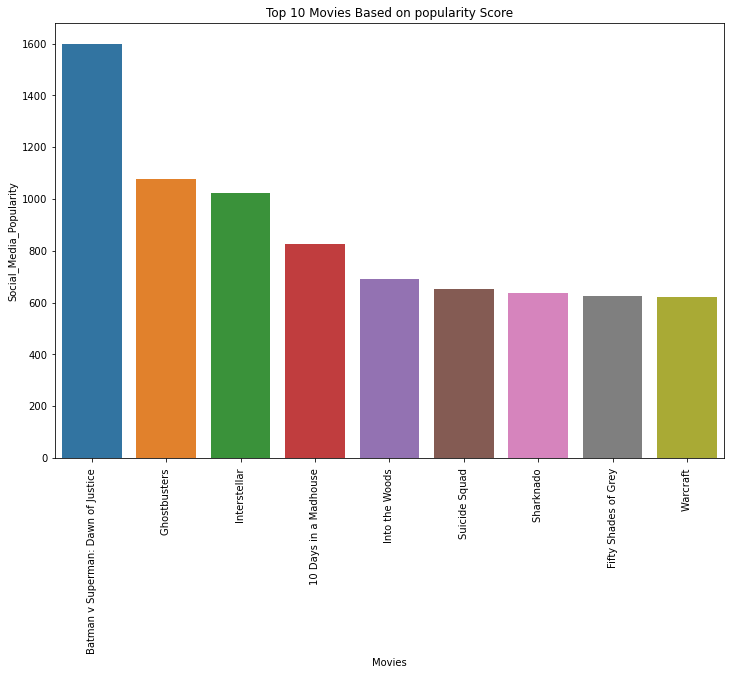

In [28]:
# Social media popularity of movies
data['Social_Media_Popularity'] = (data['num_user_for_reviews']/
                                   data['num_voted_users'])*data["movie_facebook_likes"]

# lets also check the Top 10 Most Popular Movies on Social Media
plt.figure()
sns.barplot(x="movie_title",y="Social_Media_Popularity",data=data.loc[:,["movie_title","Social_Media_Popularity"]].sort_values(by="Social_Media_Popularity",ascending=False).head(10))
plt.title("Top 10 Movies Based on popularity Score")
plt.xticks(rotation=90)
plt.xlabel("Movies")
plt.ylabel("Social_Media_Popularity")

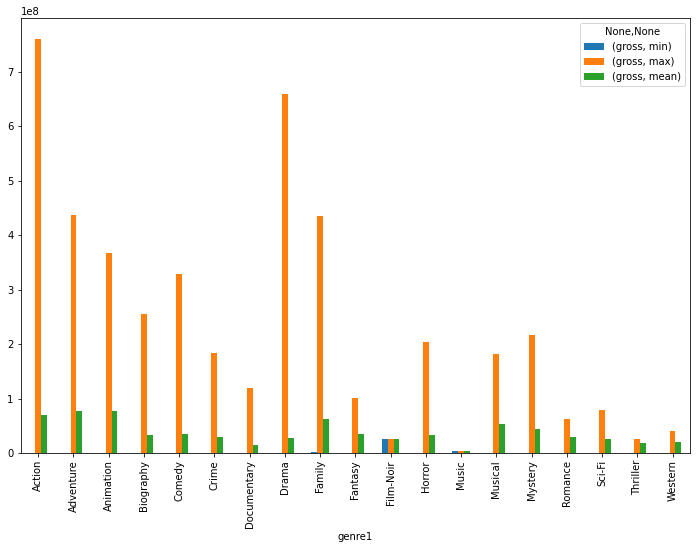

In [29]:
# lets plot genre against gross to check which genre is most bankable
data.loc[:,["gross","genre1"]].groupby("genre1").agg(["min","max","mean"]).plot(kind="bar")

Text(0.5, 0, 'movies')

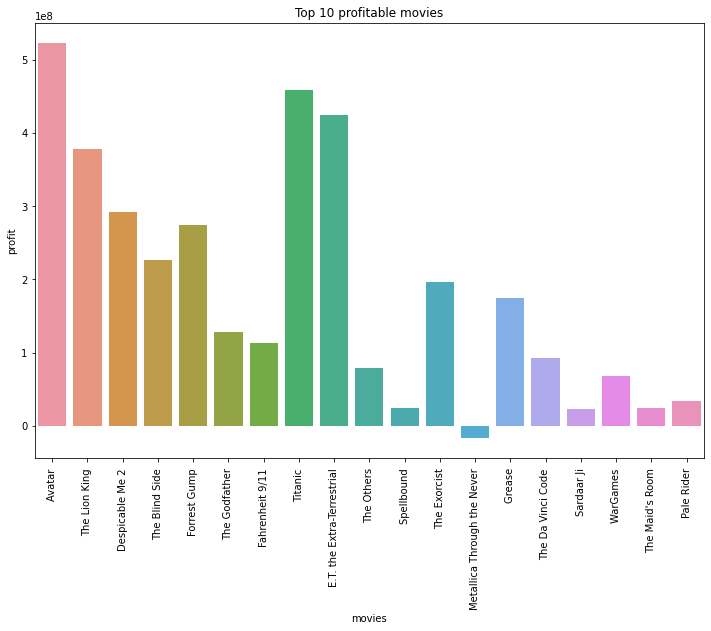

In [30]:
# Most profitable movie from each genre
data.loc[data.groupby("genre1")["profit"].idxmax(),["movie_title","genre1","gross","profit"]]
sns.barplot(x="movie_title",y="profit",data=data.loc[data.groupby("genre1")["profit"].idxmax(),["movie_title","genre1","gross","profit"]]);
plt.title("Top 10 profitable movies")
plt.xticks(rotation=90)
plt.xlabel("movies")

In [31]:
print('top 10 Most Profitable Years in Box Office')
data.groupby("title_year")["profit"].sum().sort_values(ascending=False).reset_index().head(10)
#sns.barplot(x="title_year",y="profit",.head(10))


top 10 Most Profitable Years in Box Office


,title_year,profit
0,2014.00,3829868954.00
1,2015.00,3318040899.00
2,2012.00,3169394181.00
3,2013.00,2626084590.00
4,2002.00,2215370582.00
5,2009.00,2147899214.00
6,2007.00,2016195658.00
7,2003.00,1939920161.00
8,1994.00,1615916072.00
9,2011.00,1456642485.00


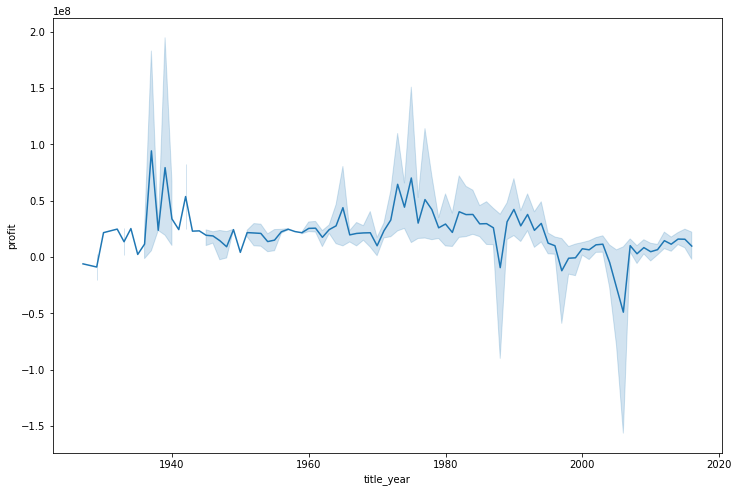

In [32]:
#ploting most profitable years 
sns.lineplot(x="title_year",y="profit",data=data)

In [33]:
#top ten movies that made that maximun Losses
data.loc[data["profit"]<-2000,["movie_title","profit"]].head(10)

,movie_title,profit
2,Spectre,-44925825.00
5,John Carter,-190641321.00
7,Tangled,-59192738.00
11,Superman Returns,-8930592.00
12,Quantum of Solace,-31631573.00
14,The Lone Ranger,-125710090.00
16,The Chronicles of Narnia: Prince Caspian,-83385977.00
18,Pirates of the Caribbean: On Stranger Tides,-8936125.00
19,Men in Black 3,-45979146.00
22,Robin Hood,-94780265.00


In [34]:
#top 10 long duration movies with maximum profit
data.loc[data["duration"]=="long",["movie_title","duration","gross","profit"]].sort_values(by="profit",ascending=False).head(10)

,movie_title,duration,gross,profit
0,Avatar,long,760505847.00,523505847.00
29,Jurassic World,long,652177271.00,502177271.00
26,Titanic,long,658672302.00,458672302.00
3024,Star Wars: Episode IV - A New Hope,long,460935665.00,449935665.00
3080,E.T. the Extra-Terrestrial,long,434949459.00,424449459.00
17,The Avengers,long,623279547.00,403279547.00
240,Star Wars: Episode I - The Phantom Menace,long,474544677.00,359544677.00
66,The Dark Knight,long,533316061.00,348316061.00
439,The Hunger Games,long,407999255.00,329999255.00
186,The Hunger Games: Catching Fire,long,424645577.00,294645577.00


In [35]:
data.loc[data["duration"]=="short",["movie_title","duration","gross","profit"]].sort_values(by="profit",ascending=False).head(10)

,movie_title,duration,gross,profit
509,The Lion King,short,422783777.00,377783777.00
812,Deadpool,short,363024263.00,305024263.00
521,Despicable Me 2,short,368049635.00,292049635.00
338,Finding Nemo,short,380838870.00,286838870.00
582,Shrek 2,short,436471036.00,286471036.00
2601,Home Alone,short,285761243.00,267761243.00
563,Minions,short,336029560.00,262029560.00
1181,The Sixth Sense,short,293501675.00,253501675.00
125,Frozen,short,400736600.00,250736600.00
519,The Secret Life of Pets,short,323505540.00,248505540.00


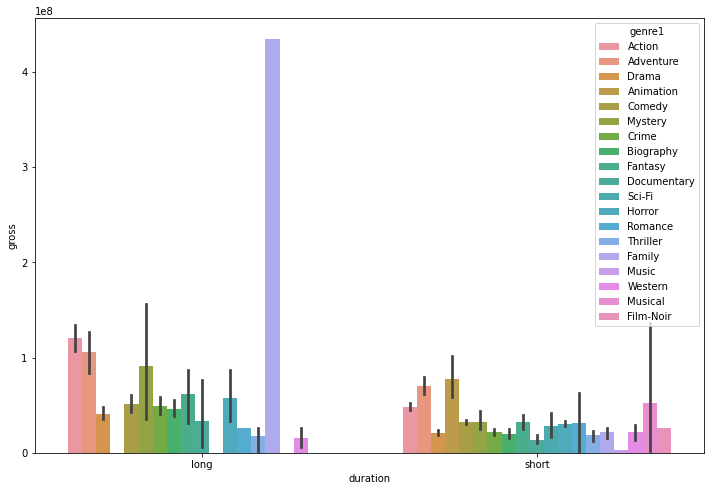

In [39]:
# gross comparisio on the basis of duration
sns.barplot(x="duration",y="gross",data=data,hue="genre1")

In [43]:
print("Average IMDB score for long Duration movie is:{0:.2f}".format(data[data["duration"]=="long"]["imdb_score"].mean()))
print("Average IMDB score for short Duration movie is:{0:.2f}".format(data[data["duration"]=="short"]["imdb_score"].mean()))

Average IMDB score for long Duration movie is:7.05
Average IMDB score for short Duration movie is:6.22


In [50]:
print("\nHighest Rated Long Duration Movie\n",data[data["duration"]=="long"][["movie_title","imdb_score"]].sort_values(by="imdb_score",ascending=False).head(1))
print("\nHighest Rated Short Duration Movie\n",data[data["duration"]=="short"][["movie_title","imdb_score"]].sort_values(by="imdb_score",ascending=False).head(1))


Highest Rated Long Duration Movie
                     movie_title  imdb_score
1937  The Shawshank Redemption         9.30

Highest Rated Short Duration Movie
         movie_title  imdb_score
4822  12 Angry Men         8.90


(array([0, 1]), <a list of 2 Text major ticklabel objects>)

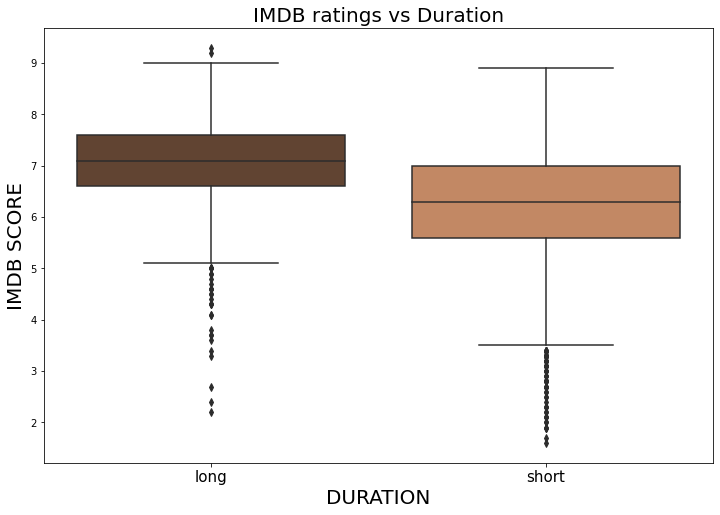

In [60]:
sns.boxplot(x=data["duration"],y=data["imdb_score"],data=data,palette = 'copper')
plt.title("IMDB ratings vs Duration",fontsize=20)
plt.xlabel("DURATION",fontsize=20)
plt.ylabel("IMDB SCORE",fontsize=20)
plt.xticks(fontsize=15)

In [78]:
# function to get the movies of an actor in decreasing order of their imdb score
def query_actor(actor):
    df1=data[data["actor_1_name"]==actor]
    df2=data[data["actor_2_name"]==actor]
    df3=data[data["actor_3_name"]==actor]
    
    df=pd.concat([df1,df2,df3])
    df=df[["movie_title","budget","gross","title_year","imdb_score"]].sort_values(by="imdb_score",ascending=False).reset_index(drop=True)
    return df

In [79]:
query_actor("Meryl Streep")

,movie_title,budget,gross,title_year,imdb_score
0,The Deer Hunter,15000000.00,25675765.00,1978.00,8.20
1,Fantastic Mr. Fox,40000000.00,20999103.00,2009.00,7.80
2,Adaptation.,19000000.00,22245861.00,2002.00,7.70
3,The Hours,25000000.00,41597830.00,2002.00,7.60
4,Doubt,20000000.00,33422556.00,2008.00,7.50
5,The Bridges of Madison County,35000000.00,70960517.00,1995.00,7.50
6,Julia,7840000.00,25675765.00,1977.00,7.40
7,August: Osage County,25000000.00,37738400.00,2013.00,7.30
8,Out of Africa,31000000.00,87100000.00,1985.00,7.20
9,Florence Foster Jenkins,29000000.00,25675765.00,2016.00,7.10


In [139]:
import warnings
warnings.filterwarnings('ignore')

def actors_report(actor):
    df1=data[data["actor_1_name"]==actor]
    df2=data[data["actor_2_name"]==actor]
    df3=data[data["actor_3_name"]==actor]
    
    df=pd.concat([df1,df2,df3])
    hitmovies=df[(df["imdb_score"]>5) & (df["profit"]>0)].shape[0]
    totalmovies=df.shape[0]
    hitratio=hitmovies/totalmovies
    print("Hit ratio {0:.2f}".format(hitratio*100))
    print("First Movie released in year {}".format(int(df.loc[:,"title_year"].sort_values().iloc[0])))
    print("Last Movie released in year {}".format(int(df.loc[:,"title_year"].sort_values().iloc[len(df)-1])))
    print("Max Gross {0:.2f}".format(df["gross"].max()))
    print("Min Gross {0:.2f}".format(df["gross"].min()))
    print("Number of 100 Million Movies :{} ".format(df[df["gross"]>100000000].shape[0]))
    print("Avg IMDB Score : {0:.2f}".format(df["imdb_score"].mean()))
    print("Most Common Genres:\n",df['genre1'].value_counts())

In [140]:
actors_report("Tom Cruise")

Hit ratio 72.41
First Movie released in year 1983
Last Movie released in year 2015
Max Gross 234277056.00
Min Gross 14998070.00
Number of 100 Million Movies :17 
Avg IMDB Score : 7.01
Most Common Genres:
 Action       14
Drama         8
Crime         2
Comedy        2
Adventure     1
Biography     1
Fantasy       1
Name: genre1, dtype: int64


## Recommend Movies Based on Actors Name

In [159]:
def recom_on_actor(actor):
    df1=data.loc[(data["actor_1_name"]==actor),["movie_title","imdb_score"]]
    df2=data.loc[data["actor_2_name"]==actor,["movie_title","imdb_score"]]
    df3=data.loc[data["actor_3_name"]==actor,["movie_title","imdb_score"]]
    
    df=pd.concat([df1,df2,df3])
    return df.sort_values(by="imdb_score",ascending=False).reset_index(drop=True)

In [160]:
recom_on_actor("Tom Cruise")

,movie_title,imdb_score
0,Rain Man,8.00
1,Edge of Tomorrow,7.90
2,Minority Report,7.70
3,The Last Samurai,7.70
4,Collateral,7.60
5,A Few Good Men,7.60
6,Interview with the Vampire: The Vampire Chroni...,7.60
7,Mission: Impossible - Ghost Protocol,7.40
8,Mission: Impossible - Rogue Nation,7.40
9,Eyes Wide Shut,7.30


In [264]:
data_subset=data[["genres","movie_title","director_name","actor_1_name","actor_2_name","actor_3_name"]]

In [265]:
data_subset=data_subset.set_index("movie_title")

In [266]:

data_subset["genres"]=data_subset["genres"].apply(lambda x: x.replace("|"," ").lower())

In [267]:
data_subset["director_name"]=data_subset["director_name"].apply(lambda x: x.lower().replace(" ",""))

In [268]:
data_subset["director_name"]

movie_title
Avatar                                           jamescameron
Pirates of the Caribbean: At World's End        goreverbinski
Spectre                                             sammendes
The Dark Knight Rises                        christophernolan
John Carter                                     andrewstanton
                                                   ...       
Newlyweds                                         edwardburns
Signed Sealed Delivered                            scottsmith
A Plague So Pleasant                          benjaminroberds
Shanghai Calling                                   danielhsia
My Date with Drew                                     jongunn
Name: director_name, Length: 4815, dtype: object

In [269]:
data_subset["actor_1_name"]=data_subset["actor_1_name"].apply(lambda x: x.lower().replace(" ",""))
data_subset["actor_2_name"]=data_subset["actor_2_name"].apply(lambda x: x.lower().replace(" ",""))
data_subset["actor_3_name"]=data_subset["actor_3_name"].apply(lambda x: x.lower().replace(" ",""))

In [270]:
data_subset

,genres,director_name,actor_1_name,actor_2_name,actor_3_name
movie_title,,,,,
Avatar,action adventure fantasy sci-fi,jamescameron,cchpounder,joeldavidmoore,wesstudi
Pirates of the Caribbean: At World's End,action adventure fantasy,goreverbinski,johnnydepp,orlandobloom,jackdavenport
Spectre,action adventure thriller,sammendes,christophwaltz,rorykinnear,stephaniesigman
The Dark Knight Rises,action thriller,christophernolan,tomhardy,christianbale,josephgordon-levitt
John Carter,action adventure sci-fi,andrewstanton,darylsabara,samanthamorton,pollywalker
...,...,...,...,...,...
Newlyweds,comedy drama,edwardburns,kerrybishé,caitlinfitzgerald,daniellapineda
Signed Sealed Delivered,comedy drama,scottsmith,ericmabius,daphnezuniga,crystallowe
A Plague So Pleasant,drama horror thriller,benjaminroberds,evaboehnke,maxwellmoody,davidchandler


In [272]:
data_subset['bag_of_words'] = data_subset[data_subset.columns[0:]].apply(lambda x:" ".join(x.astype(str)), axis=1)

In [273]:
data_subset

,genres,director_name,actor_1_name,actor_2_name,actor_3_name,bag_of_words
movie_title,,,,,,
Avatar,action adventure fantasy sci-fi,jamescameron,cchpounder,joeldavidmoore,wesstudi,action adventure fantasy sci-fi jamescameron c...
Pirates of the Caribbean: At World's End,action adventure fantasy,goreverbinski,johnnydepp,orlandobloom,jackdavenport,action adventure fantasy goreverbinski johnnyd...
Spectre,action adventure thriller,sammendes,christophwaltz,rorykinnear,stephaniesigman,action adventure thriller sammendes christophw...
The Dark Knight Rises,action thriller,christophernolan,tomhardy,christianbale,josephgordon-levitt,action thriller christophernolan tomhardy chri...
John Carter,action adventure sci-fi,andrewstanton,darylsabara,samanthamorton,pollywalker,action adventure sci-fi andrewstanton darylsab...
...,...,...,...,...,...,...
Newlyweds,comedy drama,edwardburns,kerrybishé,caitlinfitzgerald,daniellapineda,comedy drama edwardburns kerrybishé caitlinfit...
Signed Sealed Delivered,comedy drama,scottsmith,ericmabius,daphnezuniga,crystallowe,comedy drama scottsmith ericmabius daphnezunig...
A Plague So Pleasant,drama horror thriller,benjaminroberds,evaboehnke,maxwellmoody,davidchandler,drama horror thriller benjaminroberds evaboehn...


In [281]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [276]:
count=CountVectorizer()
count_matrix = count.fit_transform(data_subset['bag_of_words'])

In [277]:
# creating a Series for the movie titles so they are associated to an ordered numerical
# list I will use later to match the indexes
indices = pd.Series(data_subset.index)
indices[:5]

0                                      Avatar 
1    Pirates of the Caribbean: At World's End 
2                                     Spectre 
3                       The Dark Knight Rises 
4                                 John Carter 
Name: movie_title, dtype: object

In [278]:
count.vocabulary_

{'action': 22,
 'adventure': 75,
 'fantasy': 2534,
 'sci': 7200,
 'fi': 2566,
 'jamescameron': 3365,
 'cchpounder': 1218,
 'joeldavidmoore': 3849,
 'wesstudi': 8291,
 'goreverbinski': 2913,
 'johnnydepp': 3998,
 'orlandobloom': 6123,
 'jackdavenport': 3275,
 'thriller': 7847,
 'sammendes': 7110,
 'christophwaltz': 1456,
 'rorykinnear': 6967,
 'stephaniesigman': 7512,
 'christophernolan': 1444,
 'tomhardy': 7964,
 'christianbale': 1387,
 'josephgordon': 4143,
 'levitt': 4837,
 'andrewstanton': 390,
 'darylsabara': 1811,
 'samanthamorton': 7095,
 'pollywalker': 6473,
 'romance': 6932,
 'samraimi': 7118,
 'simmons': 7412,
 'jamesfranco': 3386,
 'kirstendunst': 4614,
 'animation': 448,
 'comedy': 1564,
 'family': 2530,
 'musical': 5825,
 'nathangreno': 5887,
 'bradgarrett': 903,
 'donnamurphy': 2148,
 'gainey': 2710,
 'josswhedon': 4189,
 'chrishemsworth': 1353,
 'robertdowneyjr': 6802,
 'scarlettjohansson': 7194,
 'mystery': 5832,
 'davidyates': 1964,
 'alanrickman': 139,
 'danielradcliff

In [279]:
count.get_feature_names()

['50cent',
 'aaliyah',
 'aaronashmore',
 'aaronhann',
 'aaronhughes',
 'aaronkwok',
 'aaronschneider',
 'aaronseltzer',
 'aaronstanford',
 'aaronstaton',
 'aaronyoo',
 'aasifmandvi',
 'abbiecornish',
 'abbyelliott',
 'abbymukiibinkaaga',
 'abelferrara',
 'abhishekbachchan',
 'abigailspencer',
 'abo',
 'abrahambenrubi',
 'abrams',
 'acemarrero',
 'action',
 'adamalexi',
 'adamarkin',
 'adambaldwin',
 'adamboyer',
 'adambrooks',
 'adambrown',
 'adambutcher',
 'adamcarolla',
 'adamcopeland',
 'adamdimarco',
 'adamgarcia',
 'adamgoldberg',
 'adamgreen',
 'adamhicks',
 'adamjayepstein',
 'adamlamberg',
 'adamlefevre',
 'adammarcus',
 'adammckay',
 'adamrapp',
 'adamratcliffe',
 'adamrayner',
 'adamrifkin',
 'adamsandler',
 'adamscott',
 'adamshankman',
 'adamtrese',
 'adelaidekane',
 'adelkaram',
 'adenyoung',
 'adhirkalyan',
 'adityaroykapoor',
 'adler',
 'adolphemenjou',
 'adrianabarraza',
 'adrianacaselotti',
 'adrianalonso',
 'adrianelenox',
 'adriangonzalez',
 'adrianholmes',
 'adrianl

In [287]:
# generating the cosine similarity matrix
cosine_sim = cosine_similarity(count_matrix, count_matrix)
cosine_sim[0]

array([1.        , 0.37796447, 0.25197632, ..., 0.        , 0.        ,
       0.        ])

In [283]:
# function that takes in movie title as input and returns the top 10 recommended movies
def recommendations(title, cosine_sim = cosine_sim):
    
    recommended_movies = []
    
    # gettin the index of the movie that matches the title
    idx = indices[indices == title].index[0]

    # creating a Series with the similarity scores in descending order
    score_series = pd.Series(cosine_sim[idx]).sort_values(ascending = False)

    # getting the indexes of the 10 most similar movies
    top_10_indexes = list(score_series.iloc[1:11].index)
    print(top_10_indexes)
    
    # populating the list with the titles of the best 10 matching movies
    for i in top_10_indexes:
        recommended_movies.append(list(data_subset.index)[i])
        
    return recommended_movies

In [296]:
movie=""
recommendations("Mission: Impossible - Rogue Nation" +'\xa0')

[153, 213, 425, 139, 209, 717, 4279, 3820, 574, 29]


['Mission: Impossible - Ghost Protocol\xa0',
 'Mission: Impossible II\xa0',
 'Mission: Impossible\xa0',
 'Mission: Impossible III\xa0',
 'The Bourne Legacy\xa0',
 'Jack Reacher\xa0',
 'Jack Reacher\xa0',
 'A Lonely Place to Die\xa0',
 'S.W.A.T.\xa0',
 'Skyfall\xa0']

In [290]:
indices.iloc[1]

"Pirates of the Caribbean: At World's End\xa0"